In [1]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs



In [5]:
#historical
fns1 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/thetao/gn/thetao_Omon_EC-Earth3_historical_r1i1p1f1_gn_185001-185012.nc'
multifns1 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/thetao/gn/*.nc'
ds1 = xr.open_dataset(fns1).thetao
multids1 = xr.open_mfdataset(multifns1).thetao
#SSP585
fns2 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/thetao/gn/thetao_Omon_EC-Earth3_ssp585_r1i1p1f1_gn_201501-201512.nc'
multifns2 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/thetao/gn/*.nc'
ds2 = xr.open_dataset(fns2).thetao
multids2 = xr.open_mfdataset(multifns2).thetao

past = multids1.sel(time = slice("1900-01-01", "1930-12-31")).isel(j=range(0,75))
meanpast = past.mean('time')

recent = multids1.sel(time = slice("1984-01-01", "2014-12-31")).isel(j=range(0,75))
meanrecent = recent.mean('time')

future = multids2.sel(time = slice("2070-01-01", "2100-12-31")).isel(j=range(0,75))
meanfuture = future.mean('time')

meanpast.to_netcdf("/usr/people/ijzerman/GradProject/DataFiles/thetao/thetaopast.nc")
meanrecent.to_netcdf("/usr/people/ijzerman/GradProject/DataFiles/thetao/thetaorec.nc")
meanfuture.to_netcdf("/usr/people/ijzerman/GradProject/DataFiles/thetao/thetaofut.nc")

In [4]:
dsrec = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetaorec.nc')
dsfut = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/thetao/thetaofut.nc')
diff = dsfut - dsrec

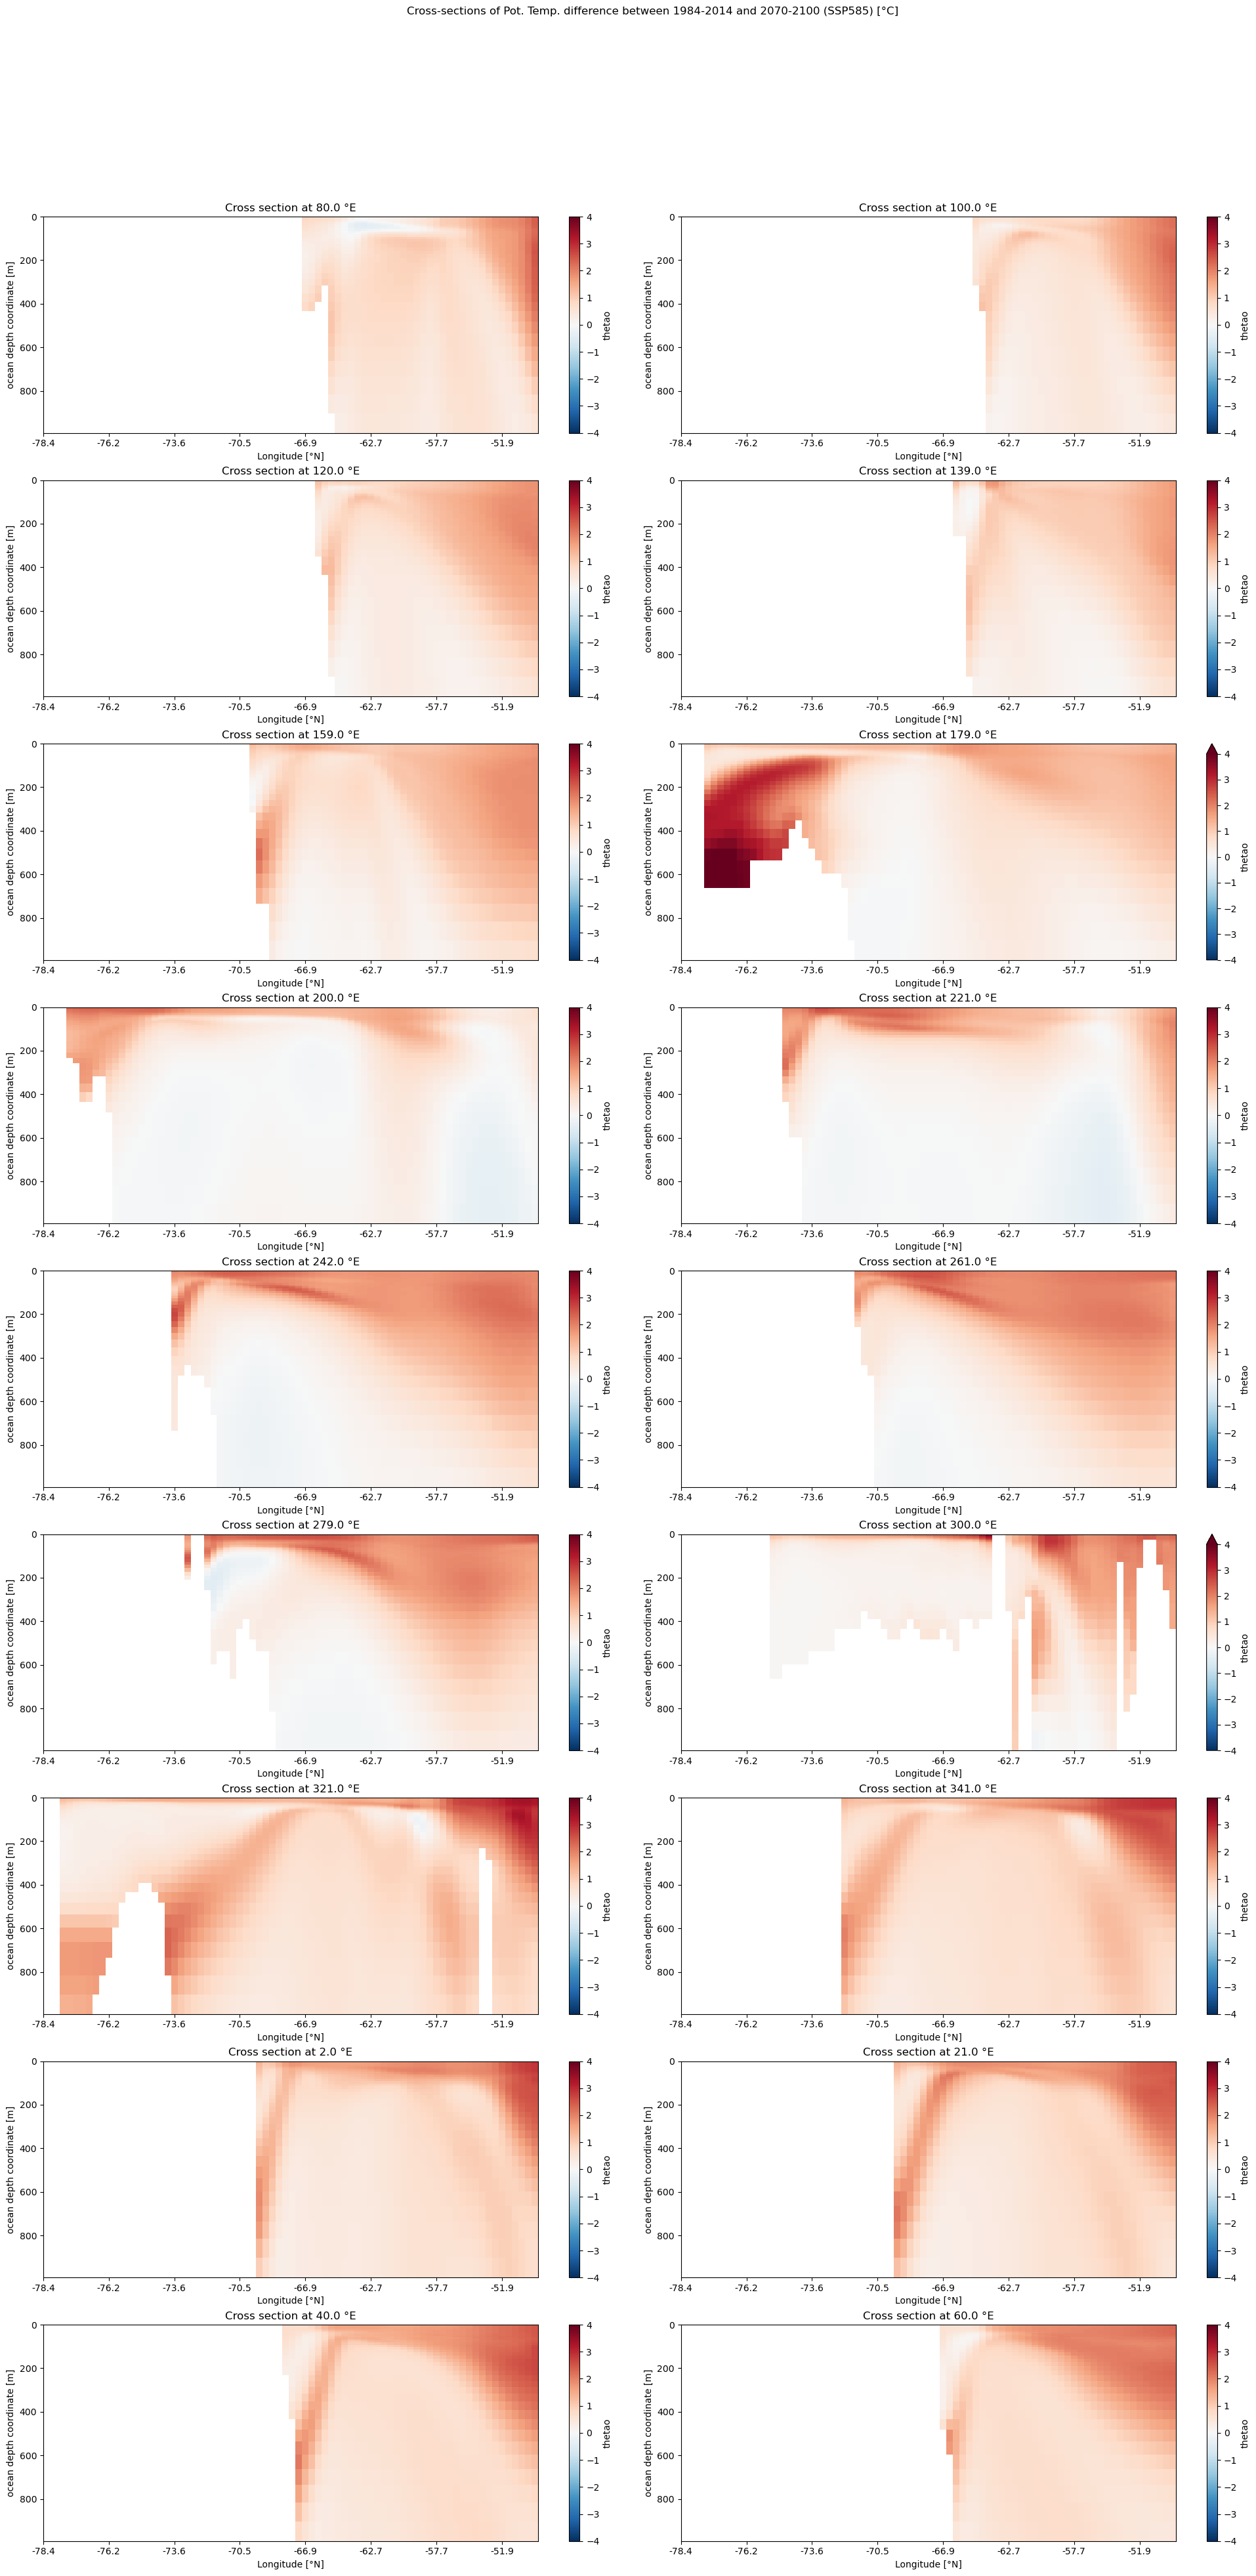

In [12]:
num_plots = len(range(0, 360, 20))
cols = 2  # Number of columns in the subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows

fig, axs = plt.subplots(rows, cols, figsize=(20, 40))

for idx, ax, in zip(range(8, 368, 20), axs.flat):
    im = diff.isel(i=diff.i[idx]).isel(lev=range(0,46)).plot(cmap='RdBu_r', vmin=-4, vmax=4, ax=ax)
    ax.invert_yaxis()
    ax.set_title(f"Cross section at {str(np.round(diff.longitude.isel(i=idx, j=1).values,0))} °E")
    ax.set_xticks(range(0, 75, 10))
    ax.set_xticklabels(np.round(diff.latitude.isel(i=1, j=range(0,75,10)).values,1))
    ax.set_xlabel('Longitude [°N]')

# Hide any remaining empty subplots
for ax in axs.flat[num_plots:]:
    ax.axis('off')

plt.suptitle('Cross-sections of Pot. Temp. difference between 1984-2014 and 2070-2100 (SSP585) [°C]')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

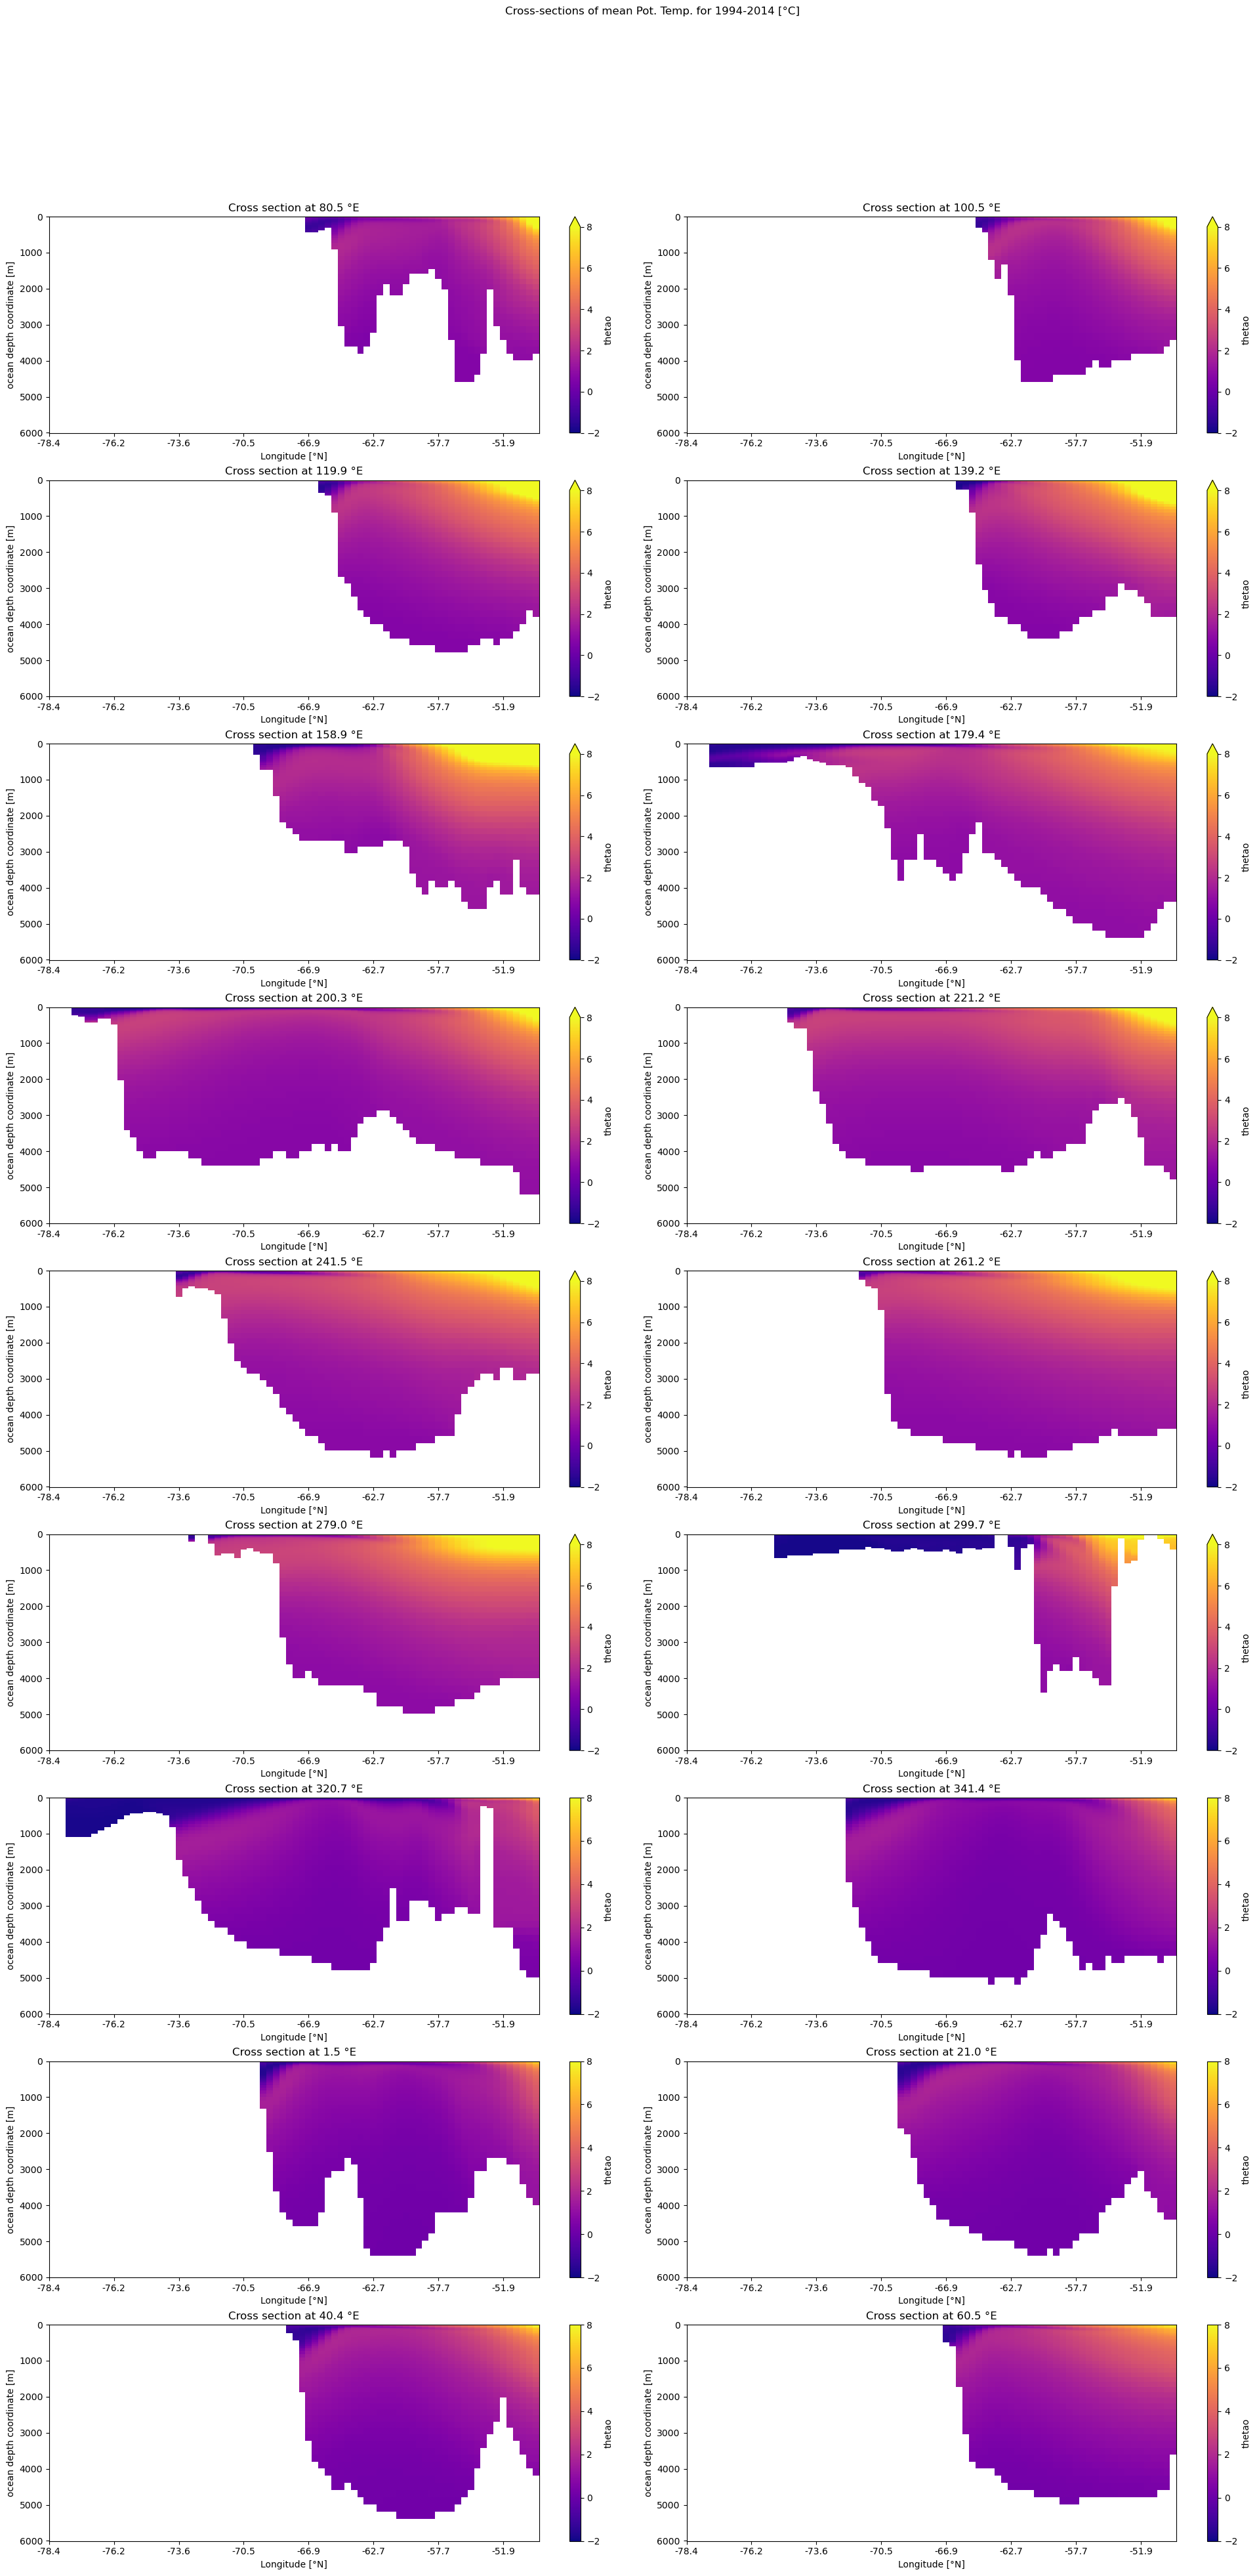

In [9]:
num_plots = len(range(0, 360, 20))
cols = 2  # Number of columns in the subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows

fig, axs = plt.subplots(rows, cols, figsize=(20, 40))

for idx, ax, in zip(range(8, 368, 20), axs.flat):
    im = dsrec.isel(i=dsrec.i[idx]).isel(j=range(0, 75)).plot(cmap='plasma', vmin=-2, vmax=8, ax=ax)
    ax.invert_yaxis()
    ax.set_title(f"Cross section at {str(np.round(dsrec.longitude.isel(i=idx, j=1).values,1))} °E")
    ax.set_xticks(range(0, 75, 10))
    ax.set_xticklabels(np.round(dsrec.latitude.isel(i=1, j=range(0,75,10)).values,1))
    ax.set_xlabel('Longitude [°N]')

# Hide any remaining empty subplots
for ax in axs.flat[num_plots:]:
    ax.axis('off')

plt.suptitle('Cross-sections of mean Pot. Temp. for 1994-2014 [°C]')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

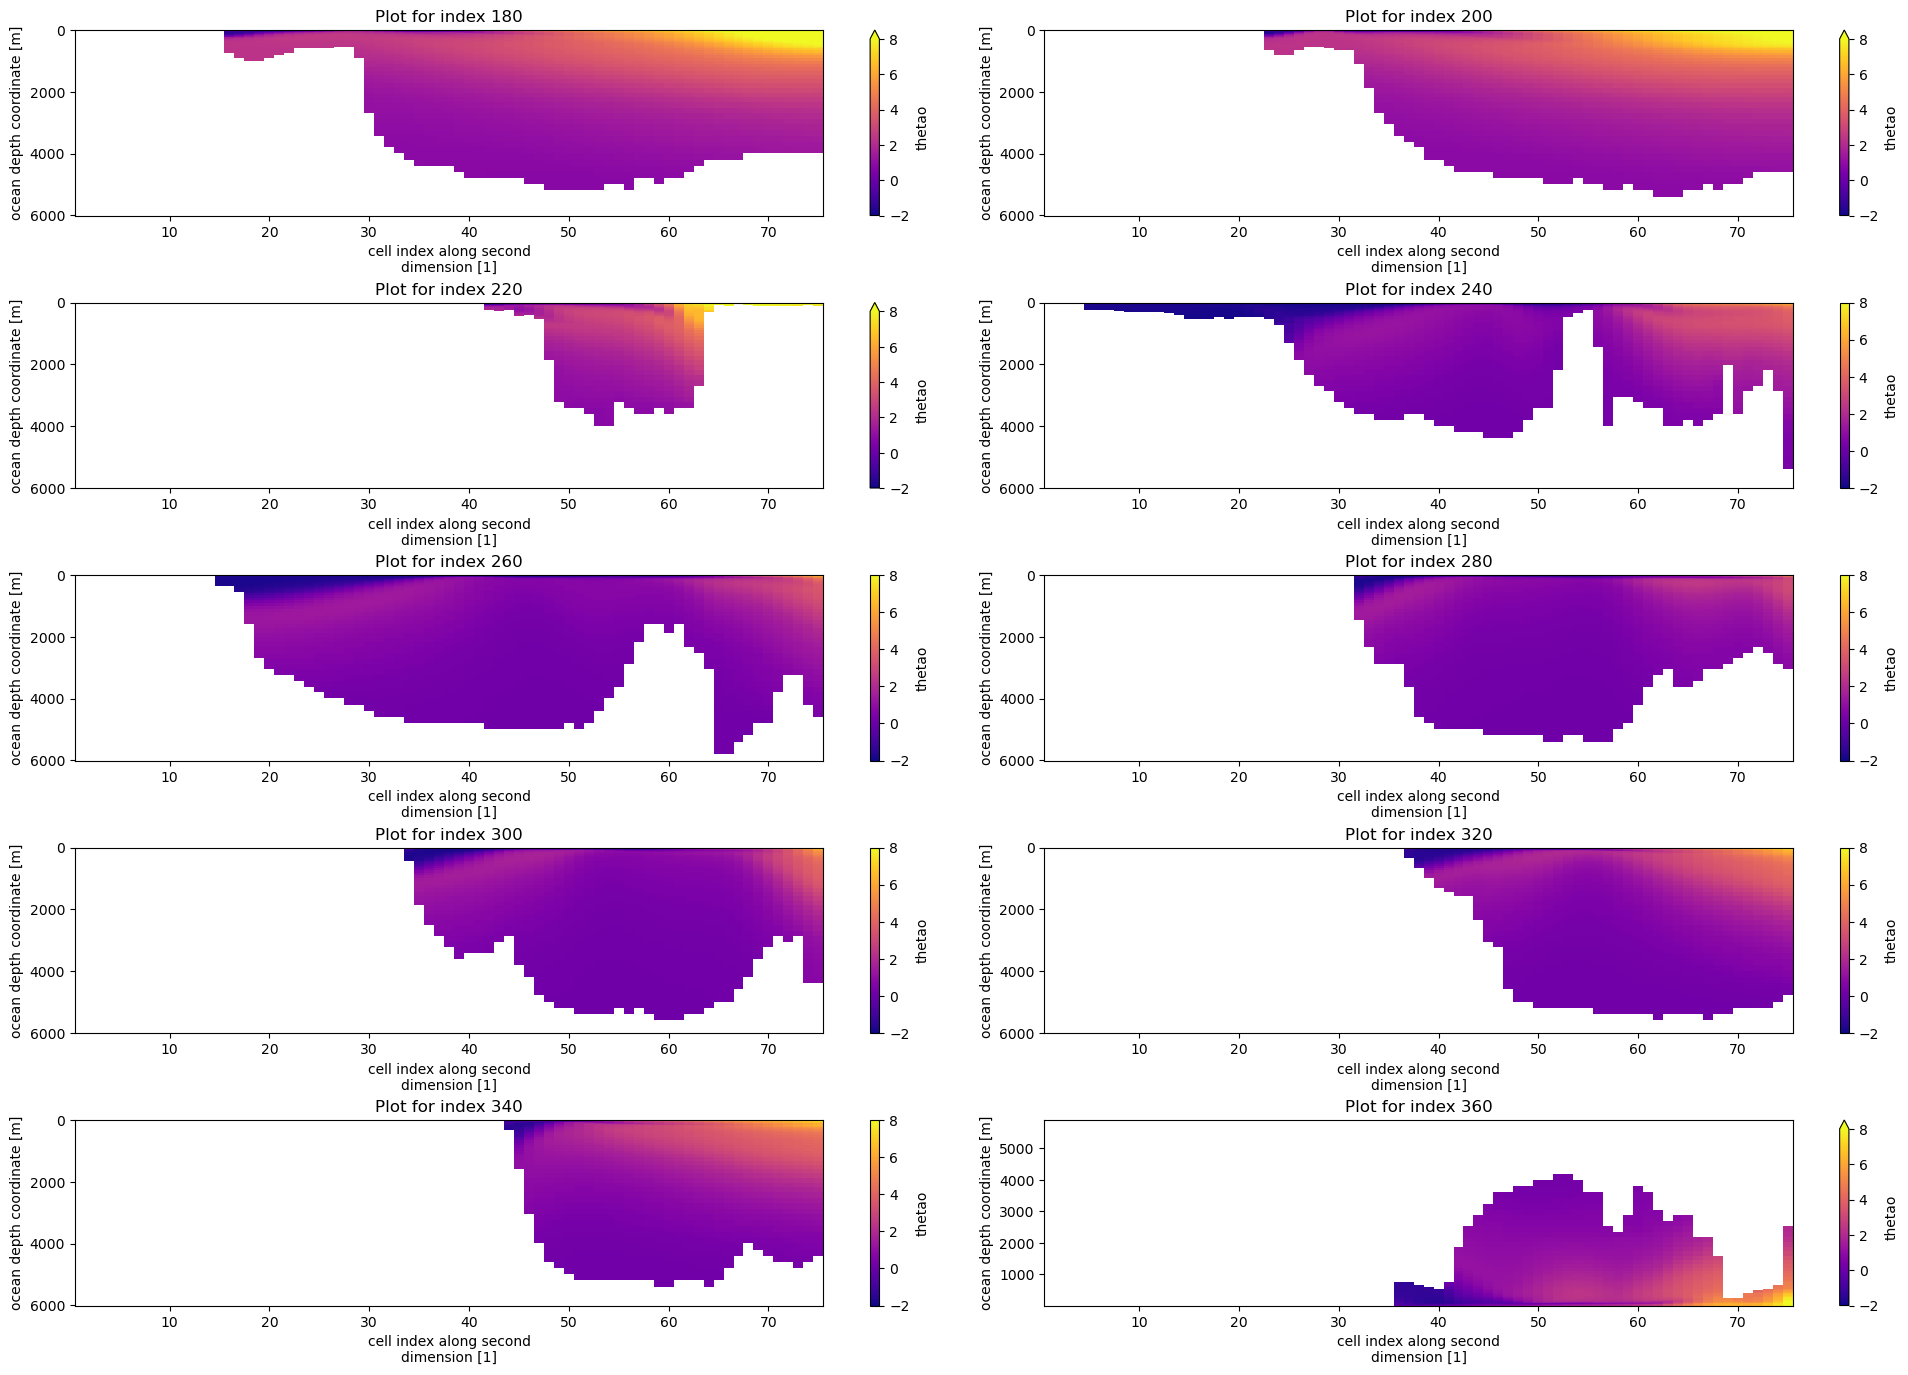

In [7]:
num_plots = len(range(180, 362, 20))
cols = 2  # Number of columns in the subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows

fig, axs = plt.subplots(rows, cols, figsize=(20, 15))

for idx, ax in zip(range(180, 362, 20), axs.flat):
    im = ds.thetao.isel(i=ds.i[idx]).isel(j=range(0, 75)).mean('time').plot(cmap='plasma', vmin=-2, vmax=8, ax=ax)
    plt.ylim(max(ds.lev), min(ds.lev))
    ax.invert_yaxis()
    ax.set_title(f"Plot for index {idx}")

# Hide any remaining empty subplots
for ax in axs.flat[num_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()